In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7eQNKJ6kyvzx6tMVNeJYxqR33JiRXJfF6XTAuZGr1MFZ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'powerprediction-donotdelete-pr-wyjl5lvwdpwntj'
object_key = 'T1.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)


In [6]:
#head funtion and tail funtion
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
data = data.rename(columns = {"Date/Time":"Date",
                            "LV ActivePower (kW)":"Active_Power",
                            "Wind Speed (m/s)":"Wind_Speed",
                            "Theoretical_Power_Curve (KWh)":"Theoretical_Power",
                            "Wind Direction (°)" :"Wind_Direction"
                           })

In [8]:
data.tail() #last 5 rows of the dataset

,Date,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620


In [9]:
#shape of the dataset
data.shape

(50530, 5)

In [10]:
#missing values

data.isna().sum()

Date                 0
Active_Power         0
Wind_Speed           0
Theoretical_Power    0
Wind_Direction       0
dtype: int64

In [11]:
#statisticak overview of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Active_Power,50530.0,1307.684332,1312.459242,-2.471405,50.677890,825.838074,2482.507568,3618.732910
Wind_Speed,50530.0,7.557952,4.227166,0.000000,4.201395,7.104594,10.300020,25.206011
Theoretical_Power,50530.0,1492.175463,1368.018238,0.000000,161.328167,1063.776283,2964.972462,3600.000000
Wind_Direction,50530.0,123.687559,93.443736,0.000000,49.315437,73.712978,201.696720,359.997589


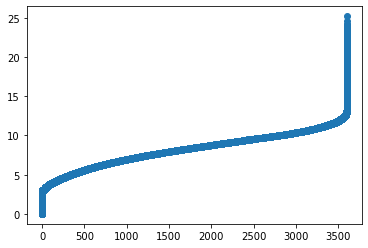

In [12]:
#scatterplot
plt.scatter(data['Theoretical_Power'],data['Wind_Speed'])

In [13]:
#split the data

x=x = data[["Theoretical_Power", "Wind_Speed"]]
y=data["Active_Power"]

In [14]:
x=x = data[["Theoretical_Power", "Wind_Speed"]].values
y=data["Active_Power"].values

In [15]:
x

array([[ 416.32890782,    5.31133604],
       [ 519.91751106,    5.67216682],
       [ 390.90001581,    5.2160368 ],
       ...,
       [1788.28475526,    8.43535805],
       [2418.38250336,    9.42136574],
       [2779.18409628,    9.97933197]])

In [16]:
y

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
from sklearn.ensemble import RandomForestRegressor

RFR= RandomForestRegressor(n_estimators = 750, max_depth = 4, max_leaf_nodes = 500, random_state = 1)

RFR.fit(x_train,y_train) 

RandomForestRegressor(max_depth=4, max_leaf_nodes=500, n_estimators=750,
                      random_state=1)

In [19]:
x_test

array([[  20.47739093,    3.10978603],
       [3070.53777125,   10.50998974],
       [ 296.46239192,    4.8349452 ],
       ...,
       [1350.54896448,    7.6765089 ],
       [  65.00379195,    3.60780406],
       [  62.91612494,    3.59148693]])

In [20]:
#predcition on the test data
y_pred=RFR.predict(x_test)
y_pred

array([  10.38492135, 2580.64445784,  194.26238517, ..., 1181.77958225,
         10.38492135,   10.38492135])

In [21]:
#predccition in the train data 
pred=RFR.predict(x_train)
pred

array([  10.38492135,  527.05745543, 1007.24771103, ...,   10.38492135,
        823.92163772, 2854.32349692])

In [22]:
#FInding accuracy

from sklearn.metrics import r2_score

acc=r2_score(y_test,y_pred)

acc

0.9180819341267901

In [24]:
# Deployment

In [25]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 6.6 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.255
    Uninstalling ibm-watson-machine-learning-1.0.255:
      Successfully uninstalled ibm-watson-machine-learning-1.0.255


In [26]:
from ibm_watson_machine_learning import APIClient

In [27]:
wml_credentials = {
    "apikey":"S0ahhsqevpUY0Eu1YKv5Kyl38OMCy3haa5WCXw0am_wL",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [28]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------  ------------------------
ID                                    NAME                   CREATED
2e6bb5d6-f48b-4c2c-b5dc-ff3a250aa678  Wind_Power_Prediction  2022-11-06T13:45:38.000Z
888785e5-6a02-435e-b80d-e3cff3e63442  models                 2022-10-09T14:26:59.138Z
------------------------------------  ---------------------  ------------------------


In [29]:
space_id = "2e6bb5d6-f48b-4c2c-b5dc-ff3a250aa678"

In [30]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [31]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [36]:
MODEL_NAME = 'Power_Prediction'
DEPLOYMENT_NAME = 'Power_deploy'
POWER_MODEL = RFR

In [37]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [38]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [40]:
#Save model
model_details = wml_client.repository.store_model(
    model=POWER_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [41]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-06T15:52:28.415Z',
  'id': '5402985f-e868-47f6-8606-238cde651a48',
  'modified_at': '2022-11-06T15:52:32.336Z',
  'name': 'Power_Prediction',
  'owner': 'IBMid-667000ASTM',
  'resource_key': '932a574e-bbda-4edd-a2fb-8138278dd6c5',
  'space_id': '2e6bb5d6-f48b-4c2c-b5dc-ff3a250aa678'},
 'system': {'warnings': []}}